In [1]:
%matplotlib inline
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
import math

# Using CAMB

In [2]:
#Set up a new set of parameters for CAMB
import camb
from camb import model, initialpower
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none


Note: redshifts have been re-sorted (earliest first)


In [3]:
results = camb.get_results(pars)
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())



# Plot the resultant Power spectrums, CMB and Matter

(2551, 4)


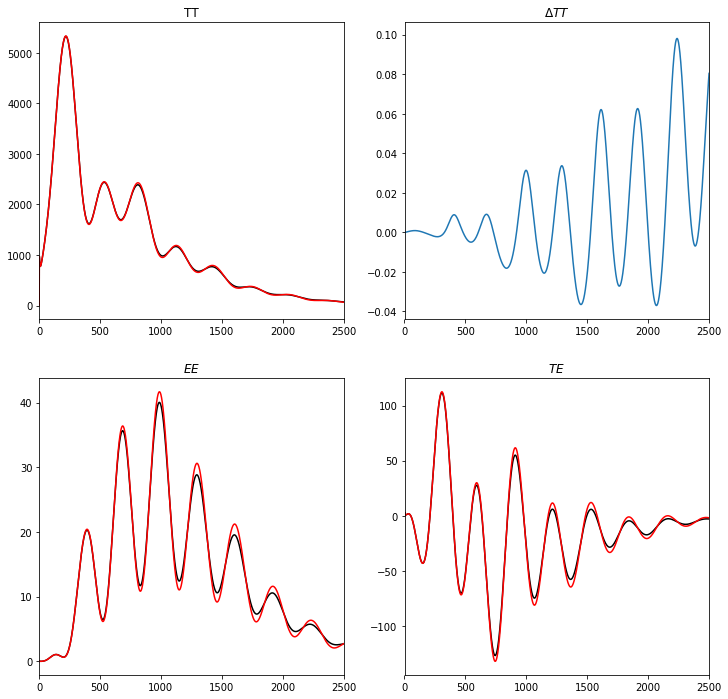

In [4]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,2500]);

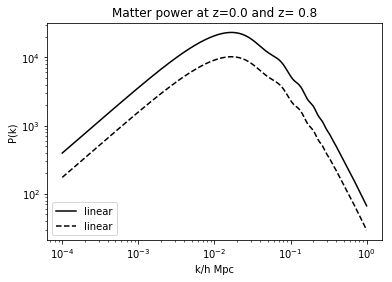

In [5]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
plt.xlabel('k/h Mpc');
plt.ylabel('P(k)')
plt.legend(['linear','linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));




# To see what are all the variable you have available, just print the pars variable. 

In [6]:
print(pars)


WantCls = 1
WantTransfer = 1
WantScalars = 1
WantTensors = 0
WantVectors = 0
DoLensing = 1
want_zstar = 0
want_zdrag = 0
PK_WantTransfer = 0
NonLinear = 0
Want_CMB = 1
max_l = 2650
max_l_tensor = 600
max_eta_k = 6625.0
max_eta_k_tensor = 1200.0
omegab = 0.0482853223594
omegac = 0.267764060357
omegav = 0.682534663613
omegan = 0.00141595367142
H0 = 67.5
TCMB = 2.7255
YHe = 0.245223829794
num_nu_massless = 2.03066666667
num_nu_massive = 1
nu_mass_eigenstates = 1
share_delta_neff = 0
nu_mass_degeneracies = [1.0153333333333332, 0.0, 0.0, 0.0, 0.0]
nu_mass_fractions = [1.0, 0.0, 0.0, 0.0, 0.0]
nu_mass_numbers = [1, 0, 0, 0, 0]
scalar_initial_condition = 1
OutputNormalization = 1
AccuratePolarization = 1
AccurateBB = 0
AccurateReionization = 1
MassiveNuMethod = 3
InitPower:
  tensor_parameterization = 2
  nn = 1
  an = [0.965, 1.0, 1.0, 1.0, 1.0]
  n_run = [0.0, 0.0, 0.0, 0.0, 0.0]
  n_runrun = [0.0, 0.0, 0.0, 0.0, 0.0]
  ant = [0.0, 0.0, 0.0, 0.0, 0.0]
  nt_run = [-0.0, 0.0, 0.0, 0.0, 0.0]
 


# Using CLASS

In [7]:
from classy import Class

In [8]:
cosmo_lcdm= Class()
params_lcdm={'h':'0.675',
        'T_cmb':'2.7255', 
        'omega_b':'0.022',
        'omega_cdm':'0.122',
        'N_ur':'3.046',
        'P_k_max_h/Mpc':'100.','output':'mPk','k_pivot':'0.05',
        'tau_reio':'0.06',
        'gauge':'synchronous',
        'A_s': '2.e-9',
        'n_s':'0.965',
        'alpha_s':'0.',        
        'P_k_ini type': 'analytic_Pk',
        
        }
cosmo_lcdm.set(params_lcdm)
cosmo_lcdm.compute()

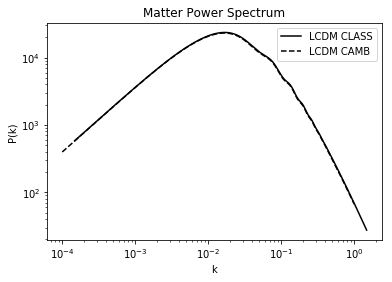

In [9]:
Pk_lcdm=np.vectorize(cosmo_lcdm.pk)
plt.loglog(kh/cosmo_lcdm.h(),Pk_lcdm(kh,0)*cosmo_lcdm.h()**3,'k',label='LCDM CLASS')
plt.loglog(kh, pk[0,:], '--k',label='LCDM CAMB')
plt.xlabel('k [h/Mpc]')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Matter Power Spectrum')


plt.legend()

# Use the modified class code

In [10]:
from classy_freesf import Class as class_sf

In [11]:
cosmo_sf = class_sf()
params_sf={'h':'0.6774',
        'T_cmb':'2.7255', 
        'omega_b':'0.0223',
        'N_ur':'3.046',
        'Omega_cdm':'0.000001',
        'Omega_dcdmdr':'0.0',
        'Gamma_dcdm':'0.0',
        'N_ncdm':'0',
        'Omega_k':'0.0',
        'Omega_Lambda':'0.6774','Omega_fld':'0.','Omega_scf':'-0.1',
        'attractor_ic_scf':'yes',
        'scf_parameters':'1e-24,0,1.e-40,1e-2',
        'scf_tuning_index':'3',
        'P_k_max_h/Mpc':'500.','output':'mPk','k_pivot':'0.05',
        'A_s':'2.215e-9',
        'n_s':'0.9619',
        'nonlinear_verbose':'1',
        'lensing_verbose':'1',
        'z_reio':'11.357',
        'gauge':'synchronous',
        'alpha_s':'0.',
        'z_pk':'0.',
        'P_k_ini type': 'analytic_Pk'
        }
cosmo_sf.set(params_sf)
cosmo_sf.compute()



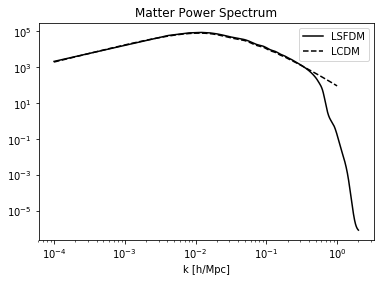

In [12]:
k=np.linspace(0.0001,2,500)
Pk_sf=np.vectorize(cosmo_sf.pk)
plt.plot(k,Pk_sf(k,0),'k',label='LSFDM')
plt.loglog(kh,Pk_lcdm(kh,0),'--k',label='LCDM')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('k [h/Mpc]')
plt.title('Matter Power Spectrum')
plt.legend()

This Cut-off in the matter power spectrum for the SFmodel is expected 

# You can see all the available variables and/or method 

In [13]:
dir(cosmo_lcdm)

['Hubble',
 'Neff',
 'Omega0_m',
 'Omega_b',
 'Omega_m',
 'Omega_nu',
 'T_cmb',
 '__call__',
 '__class__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_check_task_dependency',
 '_fillparfile',
 '_pars_check',
 'age',
 'angular_distance',
 'baryon_temperature',
 'compute',
 'density_cl',
 'empty',
 'get_background',
 'get_current_derived_parameters',
 'get_perturbations',
 'get_pk',
 'get_primordial',
 'get_thermodynamics',
 'get_transfer',
 'h',
 'ionization_fraction',
 'lensed_cl',
 'luminosity_distance',
 'n_s',
 'nonlinear_method',
 'nonlinear_scale',
 'omega_b',
 'pars',
 'pk',
 'raw_cl',
 'rs_drag',
 'set',
 'set_default',
 'sigma8',
 'state',
 'struct_cleanup',
 'z_of_r']

# You can also extract quantites from the background like the angular distance

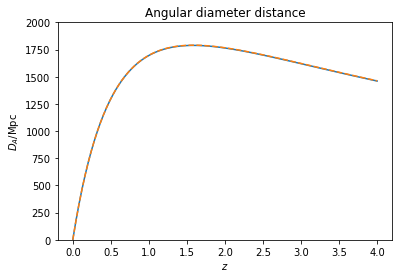

In [14]:
z = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z)
DA_class=np.vectorize(cosmo_lcdm.angular_distance)
plt.plot(z, DA)
plt.plot(z,DA_class(z),'--')
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000]);

# Excercise: Make plots of the CMB power spectrum, and the matter power spectrum for different values of cosmological parameter, varying one and leaving the others fixed. This way you can see the effect of each cosmological parameter.

# Excercise: Compute the correlation function defined as the fourier transform of the matter power spectrum. tip: compute it for "r" range between 0,200. 